In [ ]:
# Test run of the PReLIM Net API.
# Author: Jack Duryea

In [19]:
from PReLIM import PReLIM
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# Automatic reloading so we don't have to restart the kernel each time we make a change
# to CpGNet when we are debuggin
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step 1: Collect some data

In [20]:

# Some bins with 2 cpgs
bin1 = np.array([[1,0],[0,-1],[-1,1],[0,0]],dtype=float)
bin2 = np.array([[1,0],[1,0],[-1,1],[0,0],[0,1],[1,1],[0,0]],dtype=float)
bin3 = np.array([[-1,1],[0,-1],[-1,1],[0,0]],dtype=float)
bin4 = np.array([[1,-1],[0,1],[-1,1],[1,0]],dtype=float)
bin5 = np.array([[1,1],[0,0],[0,1],[1,1]],dtype=float)
bin6 = np.array([[1,1],[1,1],[0,1],[1,0]],dtype=float)
bin7 = np.array([[0,0],[1,0],[0,1],[1,1]],dtype=float)

# Collection of bins
bins = [bin1,bin2,bin3,bin4, bin5, bin6, bin7]

### Step 2: Create a model and train on the data. CpGNet will take care of  feature extraction and all that other boring stuff, it just works!

In [22]:
model = PReLIM(cpgDensity=2)

# 3 options for training/saving model
model.train(bins, model_file="no") # don't want a model file, must use "no"
#model.train(bins, model_file=None) # use a generic title w/ timestamp for the model file
#model.train(bins, model_file="my custom file") # custom file name

100%|██████████| 3/3 [00:00<00:00, 1215.98it/s]
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Step 3: Impute! (imputation result might look strange here since training data size is small)

In [23]:
model.impute(bin1)

array([[1. , 0. ],
       [0. , 0.4],
       [0.4, 1. ],
       [0. , 0. ]])

In [25]:
bin3

array([[-1.,  1.],
       [ 0., -1.],
       [-1.,  1.],
       [ 0.,  0.]])

In [24]:
model.impute(bin3)

array([[0.5, 1. ],
       [0. , 0.3],
       [0.4, 1. ],
       [0. , 0. ]])

In [26]:
binA = np.array([[0,0],[0,0],[0,-1],[0,0],[0,0]],dtype=float)

In [27]:
binB = np.array([[1,1],[1,1],[1,-1],[1,1],[1,1]],dtype=float)

In [29]:
binB

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [28]:
model.impute(binB)

array([[1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.]])

In [17]:
X,y = model.get_X_y(bins)

100%|██████████| 3/3 [00:00<00:00, 713.44it/s]


In [18]:
model.predict(X)

array([[0.55833333, 0.44166667]])

In [ ]:
model.model.predict_proba

In [31]:
predicted_matrices = model.impute_many(bins)

# Is batch imputation faster?

In [20]:
test_bins_100 = bins[:4] * 25
test_bins_1000 = bins[:4] * 250

In [151]:
len(test_bins_100)

100

In [21]:

individual_data = []

for i in tqdm(range(20)):
    start = time.time()

    for bin_ in test_bins_1000:
        model.impute(bin_)
        
    end = time.time()
    duration = end-start
    individual_data.append(duration)



100%|██████████| 20/20 [01:07<00:00,  3.68s/it]


In [25]:
batch_data

[0.2352898120880127,
 0.23407483100891113,
 0.3031899929046631,
 0.20894694328308105,
 0.29868483543395996,
 0.2079470157623291,
 0.21572375297546387,
 0.21465396881103516,
 0.2792849540710449,
 0.2733328342437744,
 0.2131509780883789,
 0.2651641368865967,
 0.22431397438049316,
 0.2121901512145996,
 0.20441913604736328,
 0.20802927017211914,
 0.21444392204284668,
 0.21159696578979492,
 0.20559382438659668,
 0.33440327644348145]

In [22]:

batch_data = []
for i in tqdm(range(20)):
    start = time.time()

    model.impute_many(test_bins_1000)
        
    end = time.time()
    end = time.time()
    duration = end-start
    batch_data.append(duration)


100%|██████████| 20/20 [00:04<00:00,  4.00it/s]


Text(0.5, 1.0, 'Imputation Speed Comparison on 1000 bins (20 trials)')

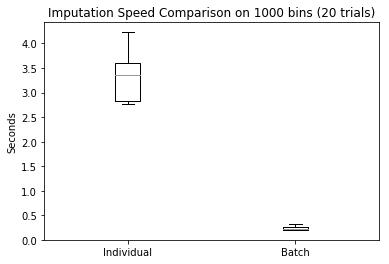

In [26]:
plt.boxplot([individual_data,batch_data]);
plt.xticks([1,2],["Individual","Batch"])
#plt.ylim([0,2.5])
plt.ylabel("Seconds")
plt.title("Imputation Speed Comparison on 1000 bins (20 trials)")
#plt.savefig("batch_speed.png",dpi=500)

In [27]:
np.mean(individual_data)

3.36770076751709

In [28]:
np.mean(batch_data)

0.2382217288017273

In [29]:
np.mean(individual_data)/np.mean(batch_data)

14.136832876064123